# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# CSVデータの読み込み
df = pd.read_csv("data/housing.csv")

In [4]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認


In [6]:
import seaborn as sns

In [8]:
sns.set()# スタイルの初期化
sns.set_style('whitegrid')

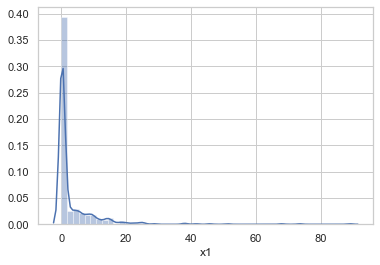

In [9]:
sns.distplot(df['x1'])

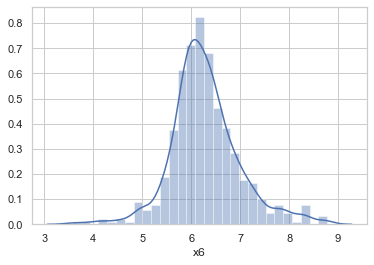

In [10]:
sns.distplot(df['x6'])

# 外れ値除去(3σ法)

- 全てのカラムに対して3σ法を適用していく必要がある。

In [42]:
col = 'x6'
col

'x6'

- 具体的にこう書いておくと、後で抽象的にまとめていくときに便利！

In [43]:
# dfの中に、このような機能がある。
# 平均
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [44]:
# x7 の平均を取ることが出来る。
mean['x7']

68.57490118577078

In [45]:
# プログラムを変えるのではなく、変数を変えることで対応できるようにしたほうが汎用性が高まる！！
mean[col]

6.284634387351788

In [46]:
# 標準偏差(standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [47]:
sigma[col]

0.7026171434153234

In [52]:
# 3σ法の一番低いラインの閾値：平均-3σ
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [55]:
# 3σ法の一番高いラインの閾値：平均+3σ
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [57]:
# df はもともとこのような感じ・
df
# dfを絞ってあげる。

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [60]:
# lowより大きいものだけ、dfの値を絞る。
df[df[col]>low]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [66]:
# lowよりも小さくて、かつHighよりも小さいものだけ、dfの値を絞る
# df[()&()]
df2 = df[(df[col]>low) & (df[col]<high)]
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [67]:
# もともとのdf
len(df)

506

In [70]:
# もともとのdfから、外れ値が除去された
# Upper と Lowerのところが除去された
len(df2)

498

# 分布の確認

## 3σ法実施後！

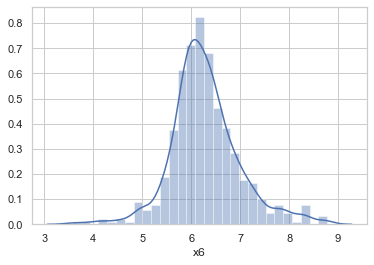

In [77]:
# 分布の確認
sns.distplot(df['x6'])#オリジナル
# 形も元のdfは正規分布に似ているので、外れ値除去が効く！

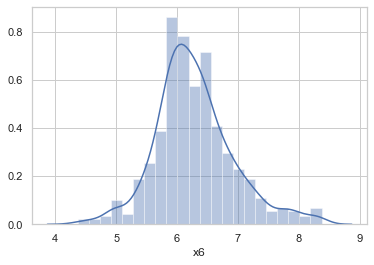

In [76]:
# 3σ法実施後
sns.distplot(df2['x6'])
# 3と9のとこの端っこが消えている！
# 外れているところ、いらないところを除去できた！

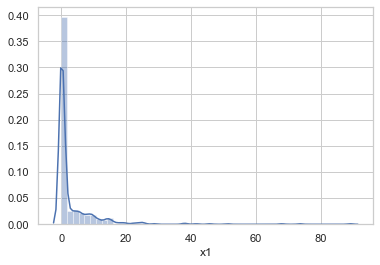

In [78]:
# 正規分布の形に近くないx1では、3σ法は適用されにくい
# 以下のような場合だと、平均ではなく中央値をベースにしたものでUpperを決めるのもあり。
# いくら以上になれば、アウト
# 正規分布以外の形を仮定した外れ値検知の方法を使ったりもする(難しいので、なれてきたら挑戦)
sns.distplot(df2['x1'])

# 3σ法を全ての変数に適用

In [82]:
# どういうカラムがあるか、全て取ることが出来る
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [88]:
# 順番にfor文でループして、Printしていく
for col in cols:
    print(col) 

x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x12
x13
y


In [98]:
# dfをtemporaryのdf(_df)にコピーしてあげる
_df = df

for col in cols:
    # 3σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    # 条件での絞り込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [99]:
_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


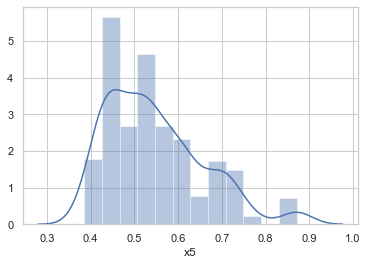

In [101]:
sns.distplot(_df['x5'])

In [103]:
# オリジナル
len(df)

506

In [108]:
# 全変数に3σ法
len(_df)
# 500 サンプルのうち、100サンプル減るのは20%ほど減っている。
# 理由は
# ① 3σ法は正規分布を仮定していて、データが正規分布に沿っていなかったので、データが減りすぎた
# ② 変数の数が13個+1個あって、合計で14個あった。本来であれば、0.3%のみ減るが、 今回は0.3%✕ 14個分の変数のデータが減る。
# 変数の数が多ければ多いほど、たくさんデータが減る。
# 3σ法を適用して、変数の数が多ければ多いほどたくさん減ってしまう。
# 減ってしまうことがボトルネックになるケースなら、減らしてしまうのではなく、違うアプローチを行う。
# 平均値や中央値で外れ値の部分を置き換えるなどの処理を行う。

415

# サンプルが減る場合の対処法

## (論文なども色々ある)

- 外れ値を取り除く
- 外れ値を平均もしくは中央値で埋める。
- 主成分分析などを使って、主成分(潜在変数)に変換した後に3σ法を適用 ← 重要な変数のみ（2つを抜き出して絞り込む(別の変数に変換する)その後、3σ法を適用）： データの減る量を調整可能 (高度)
- 実務に応用する際には上記を考慮する必要がある。

# 入力変数と出力変数に分割

In [117]:
_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [123]:
# df.iloc[行,列]
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]
# こうすると、入力変数と出力変数に切り分けてあげれる

In [124]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [125]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: y, Length: 415, dtype: float64

# 訓練データと検証データに分割

In [127]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)
# 訓練データと検証データに分割

# 重回帰分析

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
# モデルを宣言
model = LinearRegression()

In [133]:
# モデルの学習
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 学習完了！
- 検証へ！！

# 前回の結果


- 検証 ← 検証データに対して、どの程度うまく言ってるか。
- Trainで用いていないデータである、Testデータを用いてscoreを出す。

``
model.score(X_test,y_test)
0.7209056672661769
``

- 検証 ← 訓練データ

``
model.score(X_train,y_train)
0.7468316520140624
``

0.74を超えているか！！

In [135]:
# 検証 ← 訓練データ
model.score(X_train,y_train)
# 外れ値除去をなくしたことで、本質的でなかった値も外れるので精度が向上しやすい！

0.7972109224535134

In [137]:
# 検証 ← 検証データ
model.score(X_test,y_test)
# 下がってしまった。。。

0.6253776004329576

# Overfitting(過学習)

- 過去問に特化しすぎて、新しく出てきた問題は解けない。。汎用的ではなかった。
- 訓練は上がって、検証が下がってしまうような現象
- 重回帰分析はなかなか過学習を下げる方法がなかったりするので、データのクレンジングを頑張るしかない。。
- 他の機械学習の手法はハイパーパラメータという人間側で調整してあげる値があり、そこを調整しながら過学習を避ける方法を探っていく。
- この辺は、上級編で紹介！

- 外れ値除去をしてあげることで、訓練データに対しては大幅に精度を向上することが出来た！
- 検証データについては、過学習という現象が起きた。この対処が次回の課題として必要！

# スケーリング

In [139]:
# 前処理もsklearnで用意されている
from sklearn.preprocessing import StandardScaler # データの標準化を行う。

In [140]:
# scalerの宣言
scaler = StandardScaler()

In [141]:
# 平均と標準偏差を使って、スケーリングを行うので、平均と標準偏差は前もって取得しておく必要がある。
# Scalerの学習 ← 平均と標準偏差を計算
scaler.fit(X_train)
# トレーニングのデータ（訓練のデータ）のみ使う。
# Xすべて用いて平均と標準偏差を求めてもいいが、基本的にはテストデータというものは、テストのときにしか一切使わない。
# スケーリングの学習にも、モデルの学習にも一切テストデータは使わない

StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
# Scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [143]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13
159,1.42502,0.0,19.58,0,0.871,6.510,100.0,1.7659,5,403,14.7,364.31,7.39
258,0.66351,20.0,3.97,0,0.647,7.333,100.0,1.8946,5,264,13.0,383.29,7.79
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45
271,0.16211,20.0,6.96,0,0.464,6.240,16.3,4.4290,3,223,18.6,396.90,6.59


In [144]:
# もとの値から、スケールがだいぶ収まっている。
X_train2
# 3σの中に99.7%が入るようになっているので、+-3σの中に99.7%が入るので、1を超えているケースもある！

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [145]:
# Scalingを用いて、重回帰分析を行う。
# モデルの宣言
model = LinearRegression()

In [146]:
# yの値については、1つの値のときには比較対象がないので特にスケーリングは行わない。
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
# 検証 ← 訓練データ
model.score(X_train2,y_train)

0.7972109224535133

In [149]:
# 検証 ← 検証データ
model.score(X_test2,y_test)

0.6253776004329596

- 重回帰分析はスケーリングによって制度が変わるような手法ではない。
- 検証 ← 訓練データに関しては、スケーリング前後で値は同じ。
- 検証 ← 検証データに関しても、スケーリング前後で値は同じ。

## 今回の目的

- スケーリングによって、精度を上げることではなく、重みを確認し、スケールが揃った重みを見てあげてどれが重要かを参考程度に見てあげたい

In [150]:
# 重みの確認
model.coef_

array([-1.95426423e-01,  2.11543329e-01,  5.08277354e-01,  6.66133815e-16,
       -1.21336016e+00,  3.91986658e+00, -3.69861217e-01, -1.85711554e+00,
        1.16625182e+00, -1.52855186e+00, -1.87256630e+00,  2.44427080e-01,
       -2.76100147e+00])

In [153]:
# Tips 有効桁数の設定
# 指数関数での表記の禁止
np.set_printoptions(precision=2,suppress=True)

In [155]:
# 重みの確認
model.coef_
# x6が大事そうな値。3.92

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

- スケールが一定に保たれるので、重みの値を見て、どの変数が効いているのかといったところの要因として解析・プレゼンする際の目安となる。

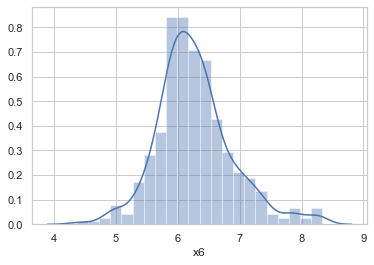

In [156]:
sns.distplot(_df['x6'])
# 正規分布に近い分布が効果が高いことがわかる。
# 相関係数の値についてもx6は大きかった。

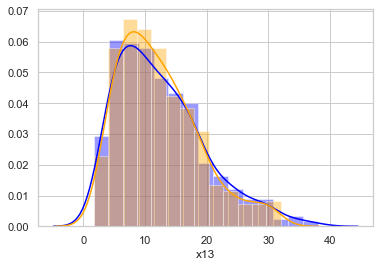

In [162]:
sns.distplot(df['x13'],color='Blue')
sns.distplot(_df['x13'],color='Orange')